## EXPLORATORY DATA ANALYSIS



### Table of Contents

1. Import Data from Module
2. Analyzing Individual Feature Patterns using Visualization
3. Descriptive Statistical Analysis
4. Basics of Grouping
5. Correlation and Causation

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Download the dataset
filepath = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"
df = pd.read_csv(filepath, header=0)

In [6]:
# View the first 5 rows of the dataset
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [7]:
# Understand the variable types to select the best visualization methods

In [15]:
# list the data types for each column
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

In [17]:
# Identify the correlation between the features:"bore", "stroke", "compression-ratio", "horsepower"
df[["bore", "stroke", "compression-ratio", "horsepower"]].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


#### Positive Linear Relationship

(0.0, 53497.647351730455)

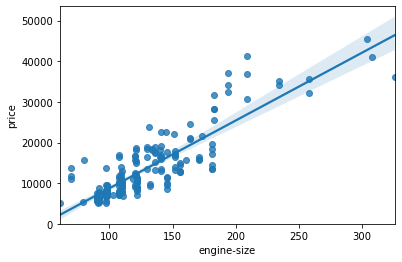

In [23]:
# Identify the indicator variable across the independent features
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

As the engine size increases, the price goes up. This indicates a positive direct correlation between these two variables. Engine size seems like a good fit predictor of price, evident through the diagonal regression line.

In [24]:
df[["engine-size","price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


The correlation coefficient of "engine-size" and "price" is 0.87 which is very close to 1

#### Negative Linear Relationship

(0.0, 48186.65140093794)

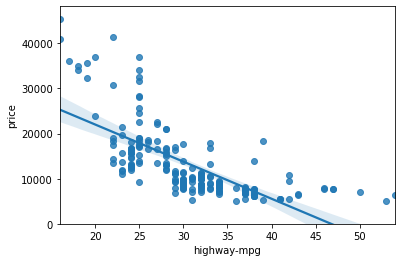

In [27]:
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

As the highway-mpg goes up, the price depreciates. This indicates that highway-mpg is negatively correlated to price.

In [29]:
df[["highway-mpg", "price"]].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


The corr. coefficient between highway-mpg and price is 0.70 which is highly negatively correlated.

#### Weak Linear Relationship

<AxesSubplot:xlabel='peak-rpm', ylabel='price'>

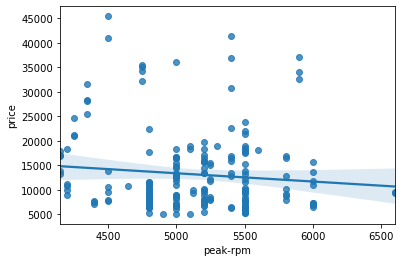

In [30]:
sns.regplot(x="peak-rpm", y="price", data=df)

Peak-rpm does not look like a good predictor of price, owing to the regression line which is almost horizontal. Additionally, the data points are scattered and far from the fitted line, implying variation. It is evident that as peak-rpm reduces, the price remains almost the same. It is not a reliable indicator

In [32]:
df[["peak-rpm", "price"]].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


The corr.coefficient between peak-rpm and price is -0.10 which is close to 0. It indicates a weak relationship

<AxesSubplot:xlabel='stroke', ylabel='price'>

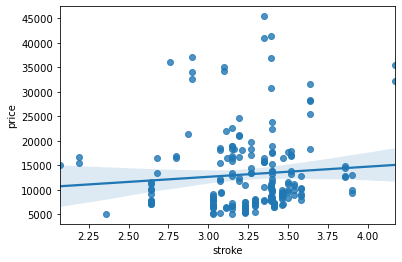

In [33]:
sns.regplot(x="stroke", y="price", data=df)

Stroke is also a week predictor for the variable price, which is evident from its regression line that is almost horizontal. The points are also scattered and far from the regression line.

In [34]:
df[["stroke", "price"]].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


The corr.coefficient is 0.082 which is close to 0. Stroke may be a poor predictor for the variable price.

#### Categorical Variables
They could have the type "object" or "int64" and are best visualized using boxplot.

<AxesSubplot:xlabel='body-style', ylabel='price'>

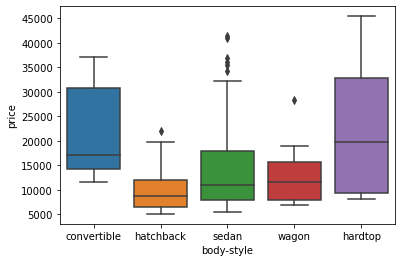

In [36]:
# Check the relationship between "body-style" and "price"
sns.boxplot(x="body-style", y="price", data=df)

The distribution of price between the different body-style category has a significant overlap, hence body-style would not be a good predictor of price. 

<AxesSubplot:xlabel='engine-location', ylabel='price'>

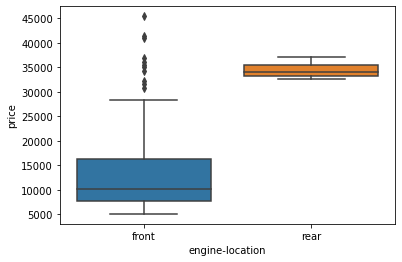

In [38]:
# Check the relationship between "body-style" and "price"
sns.boxplot(x="engine-location", y="price", data=df)

It is evident that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

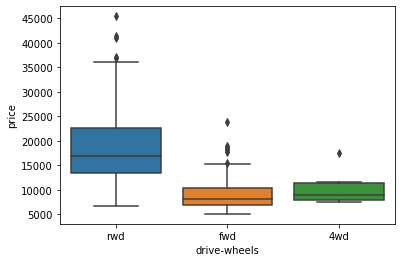

In [39]:
# Check the relationship between "drive-wheels" and "price"
sns.boxplot(x="drive-wheels", y="price", data=df)

Here the distribution of price between the different drive-wheels categories differs. Hence, drive-wheels could potentially be a good predictor of price.

### Descriptive Statistical Analysis

In [42]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [43]:
df.describe(include=["object"])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


### Value Counts

In [44]:
df["drive-wheels"].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [45]:
# convert pandas series to dataframe
df["drive-wheels"].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


In [47]:
# save the value counts for drive wheels into the dataset dataframe
drive_wheels_counts = df["drive-wheels"].value_counts().to_frame()
drive_wheels_counts.rename(columns={"drive-wheels" : "value_counts"}, inplace=True)
drive_wheels_counts

,value_counts
fwd,118
rwd,75
4wd,8


In [48]:
# rename the index to drive wheels
drive_wheels_counts.index.name = "drive-wheels"
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


In [54]:
# check the value counts for engine-location
engine_loc_counts = df["engine-location"].value_counts().to_frame()
engine_loc_counts.rename(columns={"engine-location" : "value_counts"}, inplace=True)
engine_loc_counts.index.name = "engine_location"
engine_loc_counts.head(5)

,value_counts
engine_location,
front,198
rear,3


After examining the value counts of the engine location, it is evident that engine location would not be a good predictor for price. This is due to the presence of three cars with a rear engine and 198 with an engine in the front, which makes the result skewed. Hence, the engine location does not provide any meaningful conclusion.

### Basics of Grouping

The "groupby" method groups data by different categories

In [57]:
df["drive-wheels"].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [59]:
# Identify the drive-wheels category that is most valuable
df_group_one = df[["drive-wheels", "body-style", "price"]]

In [60]:
# grouping results
df_group_one = df_group_one.groupby(["drive-wheels"], as_index=False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


From the result, it is evident that rear-wheel drive vehicles are, on average, the most expensive, while 4-wheel and front-wheel are approximately the same in price.

In [61]:
# grouping results for "drive-wheels" and "body-style"
df_gptest = df[["drive-wheels", "body-style", "price"]]
grouped_test1 = df_gptest.groupby(["drive-wheels", "body-style"], as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [63]:
# grouped data is easier to visualize on a "pivot table"
grouped_pivot = grouped_test1.pivot(index="drive-wheels", columns="body-style")
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [64]:
# fill the missing values with 0
grouped_pivot = grouped_pivot.fillna(0)
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [67]:
# Calculate the average price of each car based on body style
df_gptest1 = df[["body-style", "price"]]
grouped_test2 = df_gptest1.groupby(["body-style"], as_index=False).mean()
grouped_test2

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


### Variables: Drive Wheels and Body Style vs. Price


Utilize a heat map to visualize the relationship between body style vs price

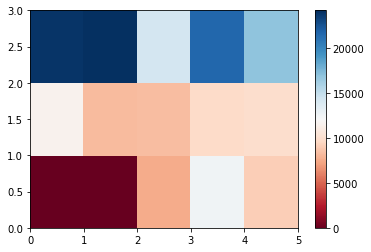

In [68]:
plt.pcolor(grouped_pivot, cmap="RdBu")
plt.colorbar()
plt.show()

The heatmap above does not provide a concise illustration of the variable relationship to price of laptops

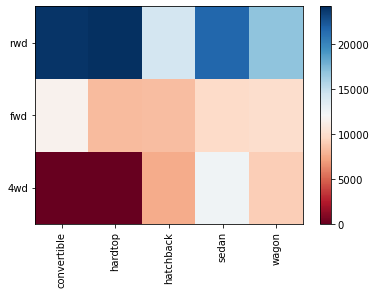

In [69]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

The heatmap above depicts that the label along the vertical axis is drive-wheels, while along the horizontal axis is body-style. 
However, it still does not portray which variable would be a good predictor for price.
Hence, to identify variables that price is largely dependent on, check out the correlation of these variables with the car price.

### Correlation and causation

In [70]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


To determine the probability value that the correlation between the variables is statistically significant, calculate the p-value.

By convention, when the

1. p-value is < 0.001: we say there is strong evidence that the correlation is significant.
 
2. the p-value is < 0.05: there is moderate evidence that the correlation is significant.
3. the p-value is < 0.1: there is weak evidence that the correlation is significant.
4. the p-value is > 0.1: there is no evidence that the correlation is significant

In [71]:
# the module "stats" in "scipy" libary can be used to calculate p-value"
from scipy import stats

### Wheel-base Vs Price

In [75]:
pearson_coef, p_value = stats.pearsonr(df["wheel-base"], df["price"])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.5846418222655081  with a P-value of P = 8.076488270732989e-20


#### Conclusion:
Since the p-value is < 0.001, the correlation between wheel-base and price is statistically significant. However, the linear relationship is not extremely strong (~0.585).

### Horsepower Vs Price

In [80]:
pearson_coef, p_value = stats.pearsonr(df["horsepower"], df["price"])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a p_value of P = ", p_value)

The Pearson Correlation Coefficient is 0.809574567003656 with a p_value of P =  6.369057428259557e-48


#### Conclusion:
Since the p-value is < 0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~ 0.809).

### Length vs. Price

In [82]:
pearson_coef, p_value = stats.pearsonr(df["length"], df["price"])
print("The Pearson Correlation Coefficient is ", pearson_coef, " with a p value of P = ", p_value)

The Pearson Correlation Coefficient is  0.690628380448364  with a p value of P =  8.016477466158986e-30


#### Conclusion:
Since the p-value is < 0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691)

### Width vs. Price

In [84]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.7512653440522674  with a P-value of P = 9.200335510481516e-38


#### Conclusion:
Since the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (~0.751).

### Curb-Weight vs. Price

In [85]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8344145257702846  with a P-value of P =  2.1895772388936914e-53


#### Conclusion:
Since the p-value is < 0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong (~0.834)

### Engine-Size vs. Price

In [86]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of P = 9.265491622198389e-64


####  Conclusion:
Since the p-value is < 0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).

### Bore vs. Price

In [87]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

The Pearson Correlation Coefficient is 0.5431553832626602  with a P-value of P =   8.049189483935489e-17


#### Conclusion:
Since the p-value is < 0.001, the correlation between bore and price is statistically significant, but the linear relationship is only moderate (~0.521).

### City-mpg vs. Price

In [88]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is -0.6865710067844677  with a P-value of P =  2.321132065567674e-29


#### Conclusion:
Since the p-value is < 0.001, the correlation between city-mpg and price is statistically significant, and the coefficient of about -0.687 shows that the relationship is negative and moderately strong.

### Highway-mpg vs. Price

In [89]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient is -0.7046922650589529  with a P-value of P =  1.7495471144477352e-31


#### Conclusion:
Since the p-value is < 0.001, the correlation between highway-mpg and price is statistically significant, and the coefficient of about -0.705 shows that the relationship is negative and moderately strong.

### Conclusion: Important variables

We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:

Continuous numerical variables:

1. Length
2. Width
3. Curb-weight
4. Engine-size
5. Horsepower
6. City-mpg
7. Highway-mpg
8. Wheel-base
9. Bore

Categorical variables:

10. Drive-wheels